In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
df=pd.read_csv('Tesla.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [4]:
df.shape

(1692, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [6]:
df.duplicated().sum().any()

False

In [7]:
df.isnull().values.any()

False

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [10]:
import plotly.graph_objects as go
figure=go.Figure(data=[go.Candlestick(x=df['Date'],open=df['Open'],high=df['High'],low=df['Low'],close=df['Close'])])
figure.update_layout(title='Tesla',xaxis_rangeslider_visible=False)
figure.show()

In [11]:
df=df.drop(columns=['Date'],axis=1)
df.head()

,Open,High,Low,Close,Volume,Adj Close
0,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1692 non-null   float64
 1   High       1692 non-null   float64
 2   Low        1692 non-null   float64
 3   Close      1692 non-null   float64
 4   Volume     1692 non-null   int64  
 5   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 79.4 KB


In [13]:
df.duplicated().sum().any()

False

In [14]:
df.isnull().values.any()

False

In [15]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [16]:
print(df.corr())

               Open      High       Low     Close    Volume  Adj Close
Open       1.000000  0.999623  0.999605  0.999233  0.407515   0.999233
High       0.999623  1.000000  0.999521  0.999691  0.416466   0.999691
Low        0.999605  0.999521  1.000000  0.999656  0.397615   0.999656
Close      0.999233  0.999691  0.999656  1.000000  0.406907   1.000000
Volume     0.407515  0.416466  0.397615  0.406907  1.000000   0.406907
Adj Close  0.999233  0.999691  0.999656  1.000000  0.406907   1.000000


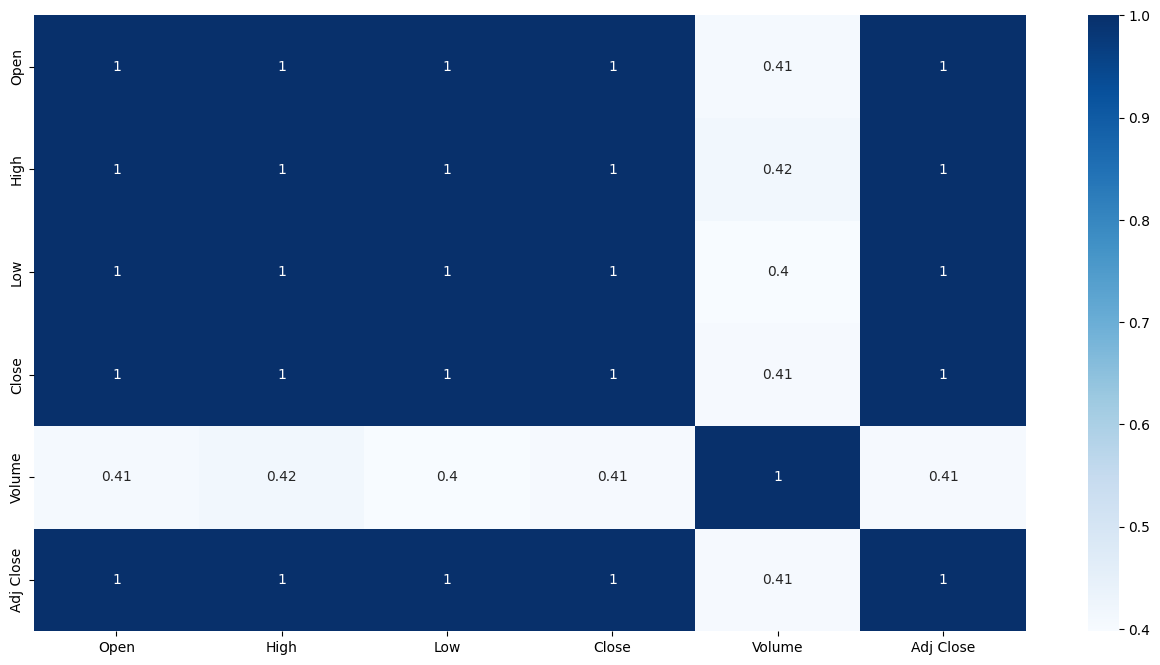

In [17]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()

<Axes: >

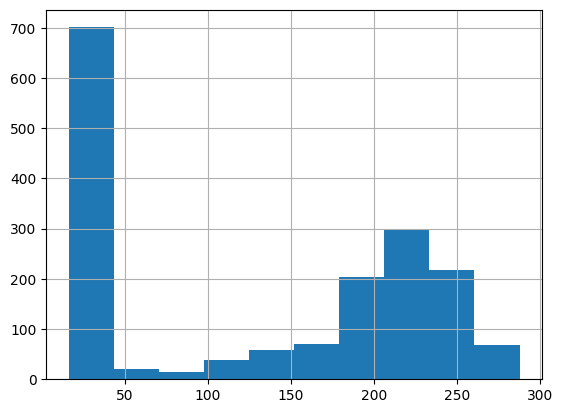

In [18]:
df['Open'].hist()

<Axes: >

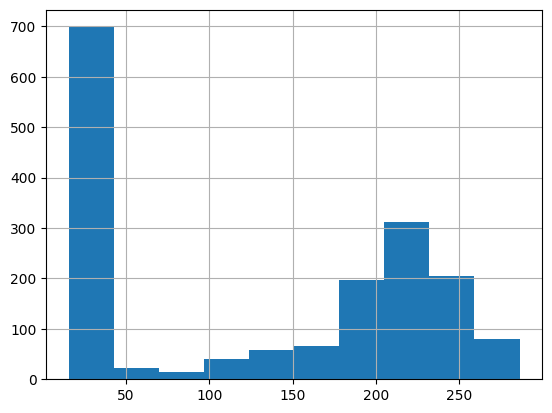

In [19]:
df['Close'].hist()

<Axes: >

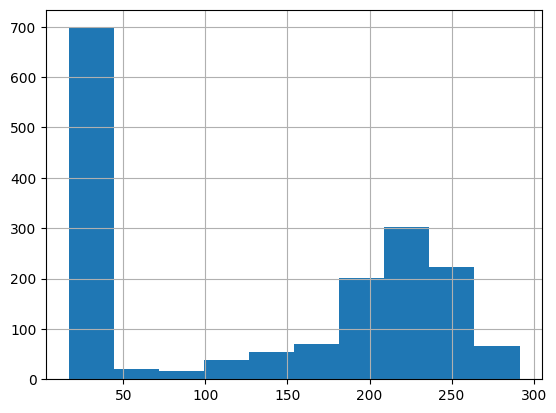

In [20]:
df['High'].hist()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,f1_score

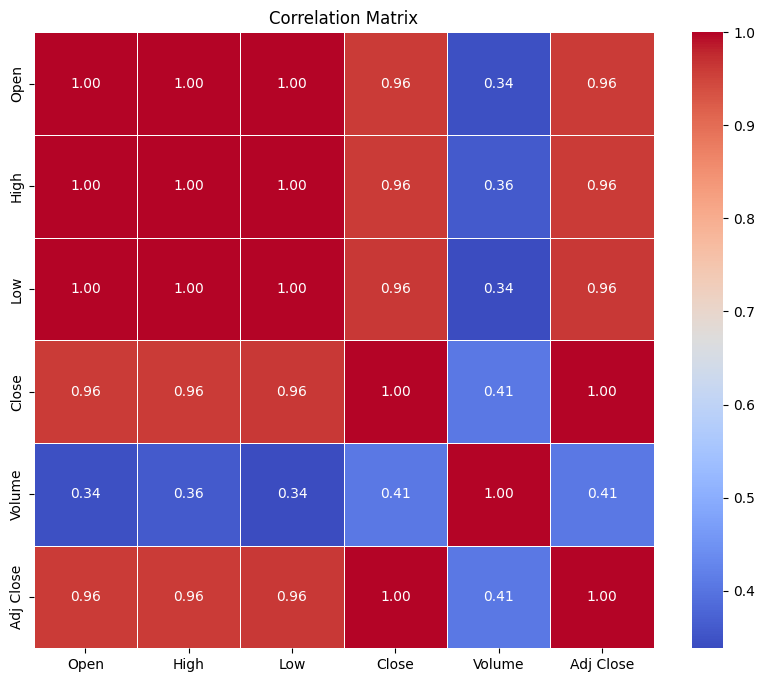

In [22]:
label_encoder = LabelEncoder()
df['Open'] = label_encoder.fit_transform(df['Open'])
df['High'] = label_encoder.fit_transform(df['High'])
df['Low'] = label_encoder.fit_transform(df['Low'])
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [23]:
x=df[['Open','High','Low','Volume']].values
y=df['Close'].values

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
print('Train:',x_train.shape)

print('Test:',x_test.shape)

Train: (1353, 4)
Test: (339, 4)


In [26]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model=regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

In [27]:
predicted = model.predict(x_test)

In [28]:
print('Model Coefficients:',regressor.coef_)
print('Model intercept:',regressor.intercept_)

Model Coefficients: [-4.44309692e-03 -9.01788094e-02  3.00499667e-01  2.31305317e-06]
Model intercept: -21.39603491501154


In [29]:
dframe=pd.DataFrame(y_test,predicted)
dfr=pd.DataFrame({'Actual_Price':y_test,'Predicted_Price':predicted})
print(dfr)

     Actual_Price  Predicted_Price
0       30.090000        47.777344
1      258.000000       263.372720
2      204.990005       169.627827
3       17.459999        -3.348836
4      263.820007       279.991406
..            ...              ...
334    183.559998       156.527843
335    241.800003       240.895828
336    164.220001       175.146587
337     29.350000        41.109696
338    237.190002       237.348650

[339 rows x 2 columns]


In [30]:
dfr.describe()

,Actual_Price,Predicted_Price
count,339.000000,339.000000
mean,130.033422,130.671384
std,95.453150,92.858190
min,15.800000,-18.192847
25%,29.300000,42.934206
50%,148.250000,140.029989
75%,219.120002,207.677268
max,284.119995,302.873886


<ipython-input-31-28ded086a1c8>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

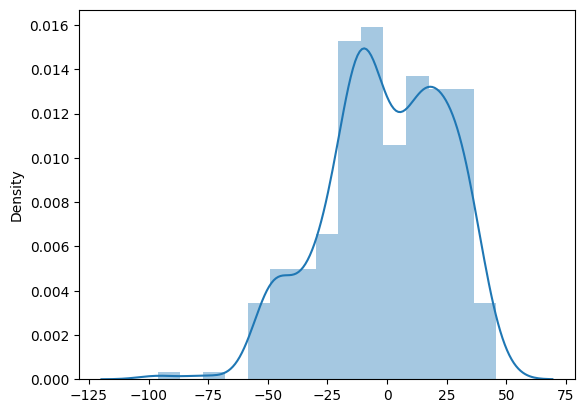

In [31]:
residual=y_test-predicted
sns.distplot(residual)